# Exam R
Mark Klik & Misja Mikkers

# Introduction

The exam consists of 2 parts. In the first part, you have to run a regression, test if the assumptions of a linear regression model are met, and make 2 graphs.

In the second part of the exam, you will have to make a map of Catholic and Protestant schools in the Netherlands.

# Packages


In [33]:
library(tidyverse)
library(gvlma)
library(dplyr)

ERROR: Error in library(gvlma): there is no package called 'gvlma'


# Assignment 1


## Data

The data are given:


In [34]:
set.seed(123)
df1 <- as.data.frame(matrix(runif(1*50, min = 1, max = 10), ncol = 1)) %>%
    mutate(epsilon = rnorm(50, mean = 0, sd = 2)) %>%
    mutate(response = 3 - 2* V1  + epsilon) %>%
    mutate(group = ifelse(V1 <= 5, 1,2))

## Asignment 1a

The first assigment is to make boxplot using ggplot with group on the x-axis and V1 on the y-axis.

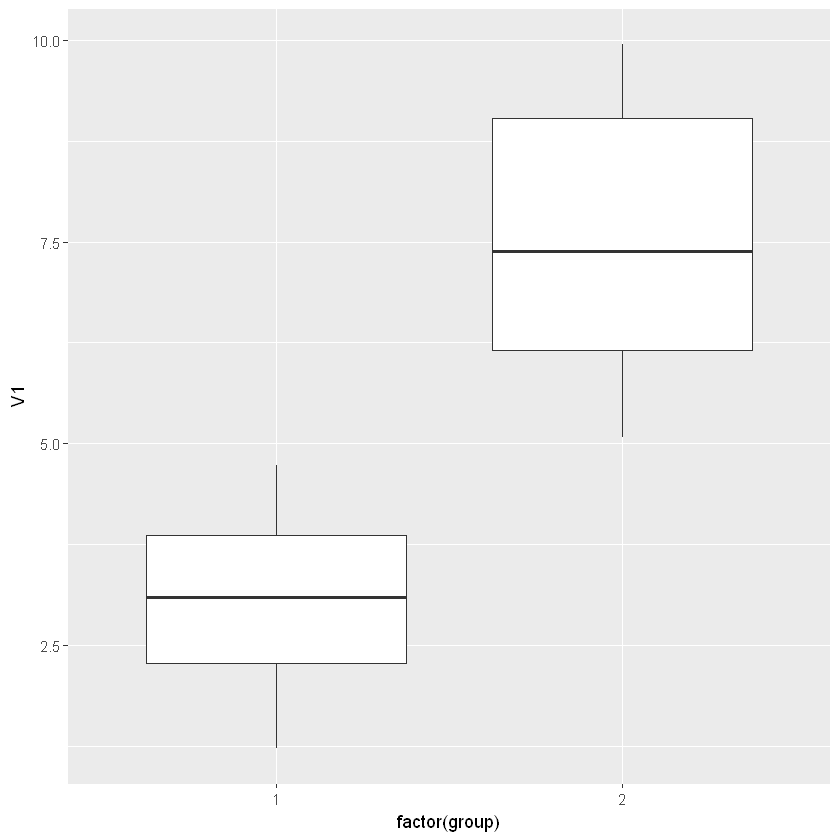

In [37]:
ggplot (df1, aes(x = factor(group), y = V1)) + geom_boxplot()


## Assignment 1b

Run a regression with response variable as a function of V1.
Show the summary statistics of the regression.


In [38]:
reg1 <- lm(data=df1, V1 ~ group)
summary(reg1)


Call:
lm(formula = V1 ~ group, data = df1)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.49501 -1.05796  0.02595  1.34275  2.37341 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.4450     0.6707  -2.154   0.0363 *  
group         4.5100     0.4052  11.130 6.78e-15 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.414 on 48 degrees of freedom
Multiple R-squared:  0.7207,	Adjusted R-squared:  0.7149 
F-statistic: 123.9 on 1 and 48 DF,  p-value: 6.783e-15


check if the assumptions of linear regression are met with the `gvlma()` function.

In [39]:
gvlma(reg1)

ERROR: Error in gvlma(reg1): 没有"gvlma"这个函数


## Assignment 1c

Make a scatterplot with: 
* V1 on the x-axis and the response on the y-axis
* Include the regression line in red with confidence interval 
* In a classic theme
* The x-axis should be labeled "Predictor", the y-axis should be labeled ("Response")



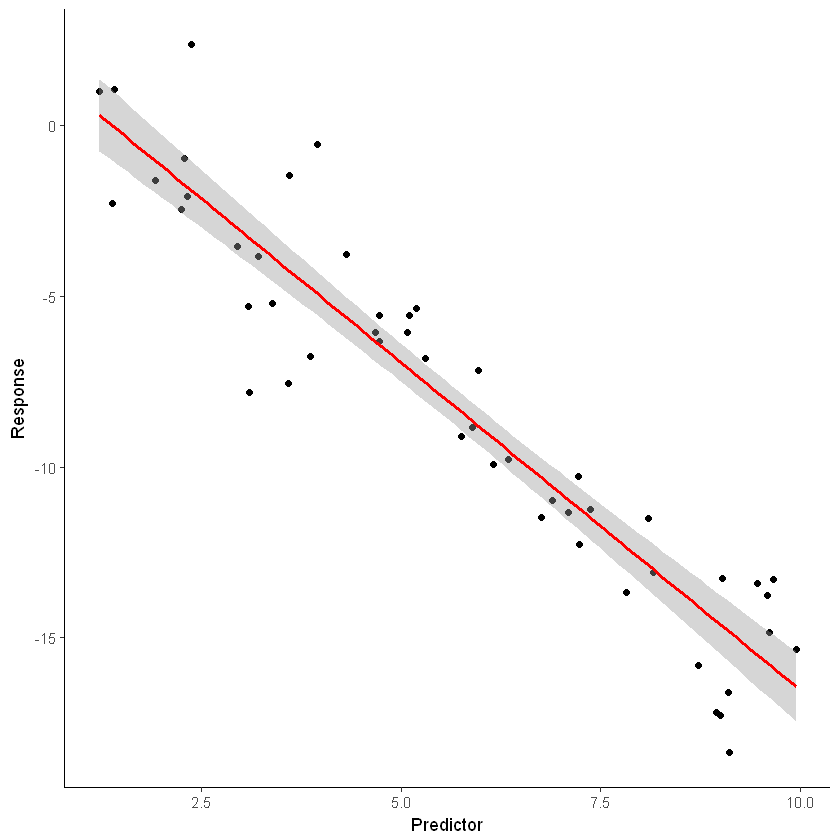

In [40]:
ggplot (df1, aes(x = V1, y = response)) + 
    geom_point() +
    geom_smooth(method='lm',formula=y~x, color = "red") +
    theme_classic() +
    xlab("Predictor") +
    ylab("Response")

# Assigment 2

# Packages

In [ ]:
install.packages('maptools', repos='http://cran.us.r-project.org')
install.packages('rgdal', repos='http://cran.us.r-project.org')
install.packages('rgeos', repos='http://cran.us.r-project.org')
install.packages("thematicmaps_2.1.tar.gz", repos = NULL, type = "source")
library(thematicmaps)
library(tidyverse)

also installing the dependency 'sp'



package 'sp' successfully unpacked and MD5 sums checked
package 'maptools' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\user\AppData\Local\Temp\RtmpEZvG7l\downloaded_packages


## Assignment 2a

First you have to read in the file "nld_municipal_map.csv".
Hint: Look at the notebook of week 6 about maps.

In [ ]:
map_municipal <- read.csv2("nld_municipal_map.csv")
head(map_municipal)

## Assignment 2b

Now you can make an empty map of the Netherlands.

In [ ]:
AddMapLayer(MapPlot(), map_municipal)

## Assignment 2c

Read in the pc4 locations (nld_pc4_locations.csv).

Hint: Don't forget the X and Y should be numeric variables!

In [ ]:
pc4_locations <- read.csv2(file = "nld_pc4_locations.csv")

str(pc4_locations)
# I read the pc4 locations.

## Assignment 2d

### 2di

Read in the school data


In [ ]:
schools <- read.csv2(file = "schools.csv")

### 2dii

First, create a new dataframe schools1, which is equal to schools.

As you see POSTCODE has a structure of (1234 AB). You should create a new variable PC4 that is equal to the first 4 numbers in POSTCODE

Hint: Use the function `substr()`

Then select the variables PC4 and DENOMINATIE

In [ ]:
schools1 <- schools %>% 
    mutate(PC4 = substr(POSTCODE,1,4))
select(schools1, "PC4", "DENOMINATIE")

### 2diii

Create the dataframe school_loc as a join from pc4_locations and school1 that combines the columns from both data frames, but only keeps rows where the value in the pc4_locations column matches in both data frames.
And then select the observations with DENOMINATIE is equal to "Rooms-Katholiek" or "Protestants-Christelijk"

In [ ]:
school_loc <- merge(schools1, pc4_locations, by = c("PC4"), x.all = TRUE)
head(school_loc)

## Assignment 2e

Create a map of Catholic and Protestant schools in the Netherlands


End of notebook